# From the given Iris Dataset, predict the optimum number of clusters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data from the Specific URL
# Reading the data by using the Pandas Library

In [9]:
data = pd.read_csv("Iris.csv")

In [10]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
data.drop("Id",axis=1,inplace=True)

In [14]:
label=data["Species"]

In [15]:
data.drop("Species",axis=1,inplace=True)

# PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

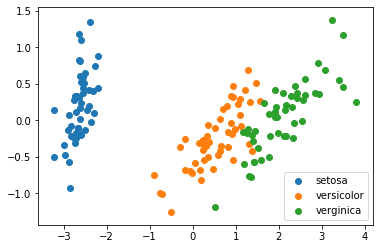

In [22]:
plt.scatter(data_pca[0:50,0],data_pca[0:50,1],label="setosa")
plt.scatter(data_pca[50:100,0],data_pca[50:100,1],label="versicolor")
plt.scatter(data_pca[100:150,0],data_pca[100:150,1],label="verginica")
plt.legend()
plt.show()

# Clustering by K-Means

In [24]:
from sklearn.cluster import KMeans
m=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(data_pca)
    m.append(km.inertia_)
    p.append(km)

In [25]:
m

[665.595566652197,
 137.1510093492074,
 63.87383806036227,
 42.3246980994397,
 33.5394081079013,
 26.062824235909133,
 21.991283374105134,
 18.154862467849227,
 15.737984019089962]

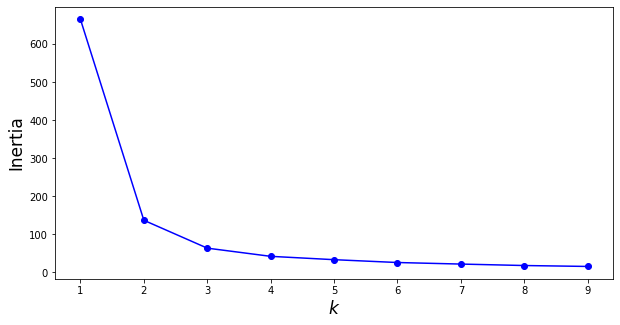

In [27]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),m, "bo-")
plt.xlabel("$k$", fontsize=17)
plt.ylabel("Inertia", fontsize=17)
plt.show()

In [28]:
#By this grpah of Elbow method, we can clearly observe that the value of k starts decreasing as an elbow from k=3

In [29]:
kmeans = KMeans(n_clusters=3, random_state=33)
y_pred = kmeans.fit_predict(data_pca)

In [31]:
w = kmeans.labels_

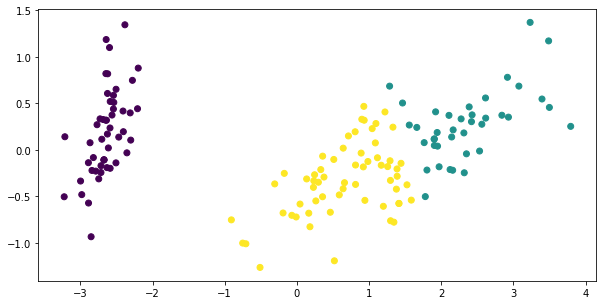

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_.astype(float))
plt.show()

In [33]:
# Therefore we can confirm that the number of clusters is equal to 3

# The End